# Self Organizing Map

SOM to identify potentially fraudulent credit card applications

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data/Credit_Card_Applications.csv')
display(dataset.head(), dataset.shape)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


(690, 16)

In [5]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [10]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1, learning_rate = 0.5)

In [11]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


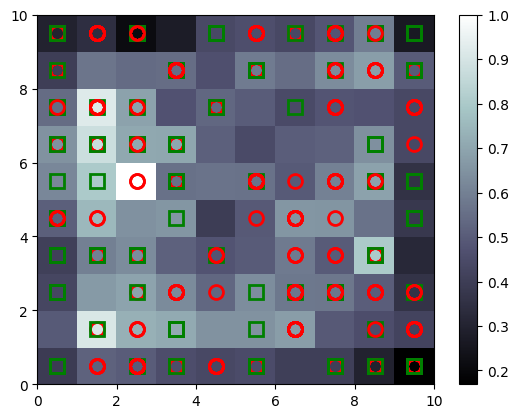

In [12]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, n in enumerate(X):
    w = som.winner(n)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

## Finding the frauds


In [14]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(1,7)]), axis = 0)
#frauds = mappings[2,8]
frauds = sc.inverse_transform(frauds)

## Printing the Potential Fraud Clients

In [15]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15692137
15676909
15610042
15568162
15662152
15734578
15795527
15603565
15664720
15645820
15800554
15696120
15567919
15687634
15638751
15606554
